In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

metrics = ['loss']
results_path = "/data/vision/polina/users/ramyamut/projects/mri_final_project/models/alternating_equi_2/metrics.json"

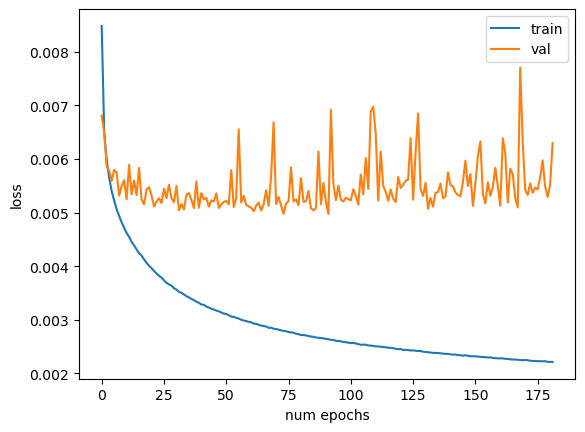

In [10]:
for metric in metrics:
    plt.figure()
    with open(results_path, 'r') as f:
        results = json.load(f)
    epochs = np.arange(len(results[f'train/{metric}']))
    metric_train = results[f'train/{metric}']
    metric_val = results[f'val/{metric}'][1:]
    plt.plot(epochs, metric_train)
    plt.plot(epochs, metric_val)
    plt.xlabel('num epochs')
    plt.ylabel(metric)
    plt.legend(['train', 'val'])
    plt.show()

file1000026_slice_20.png


/tmp/ipykernel_3428205/1165498102.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kspace = imageio.imread(path_kspace) / 255
/tmp/ipykernel_3428205/1165498102.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path_img) / 255
/tmp/ipykernel_3428205/1165498102.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  recon = imageio.imread(path_recon) / 255
/tmp

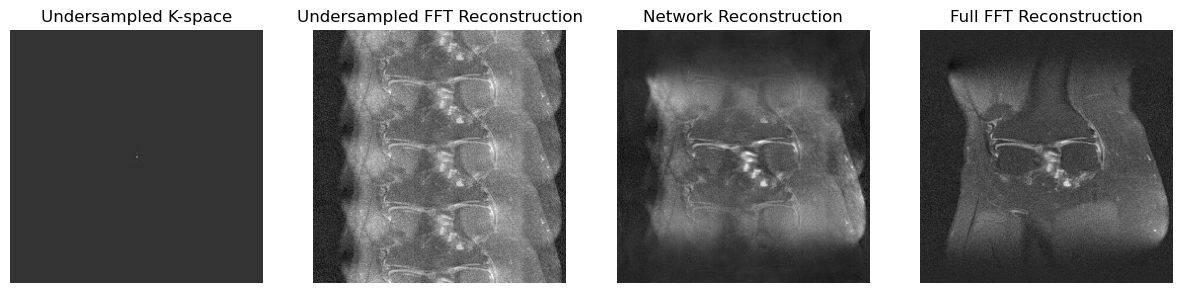

In [16]:
import imageio
import glob
import os

idx = 120
path_kspace = sorted(glob.glob("/data/vision/polina/users/ramyamut/projects/mri_final_project/models/alternating_equi_4/results/kspace/*.png"))[idx]
print(os.path.basename(path_kspace))
kspace = imageio.imread(path_kspace) / 255
path_img = path_kspace.replace("/kspace/", "/img/")
img = imageio.imread(path_img) / 255
path_recon = path_kspace.replace("/kspace/", "/recon/")
recon = imageio.imread(path_recon) / 255
path_pred = path_kspace.replace("/kspace/", "/pred/")
pred = imageio.imread(path_pred) / 255

plt.figure(figsize=(15,15))
ax = plt.subplot(1, 4, 1)
ax.imshow(kspace, cmap='gray')
ax.set_title("Undersampled K-space")
ax.axis('off')

ax = plt.subplot(1, 4, 2)
ax.imshow(img, cmap='gray')
ax.set_title("Undersampled FFT Reconstruction")
ax.axis('off')

ax = plt.subplot(1, 4, 3)
ax.imshow(pred, cmap='gray')
ax.set_title("Network Reconstruction")
ax.axis('off')

ax = plt.subplot(1, 4, 4)
ax.imshow(recon, cmap='gray')
ax.set_title("Full FFT Reconstruction")
ax.axis('off')

plt.show()

In [ ]:
pred

Model: alternating_equi_2, SSIM: 0.8983984439155503 +/- 0.08133818649956691
Model: alternating_equi_4, SSIM: 0.7703379005934007 +/- 0.1262922793571925
Model: alternating_random_2, SSIM: 0.8085344469013045 +/- 0.11034569241098881
Model: alternating_random_4, SSIM: 0.7060502020999481 +/- 0.15731263767650078


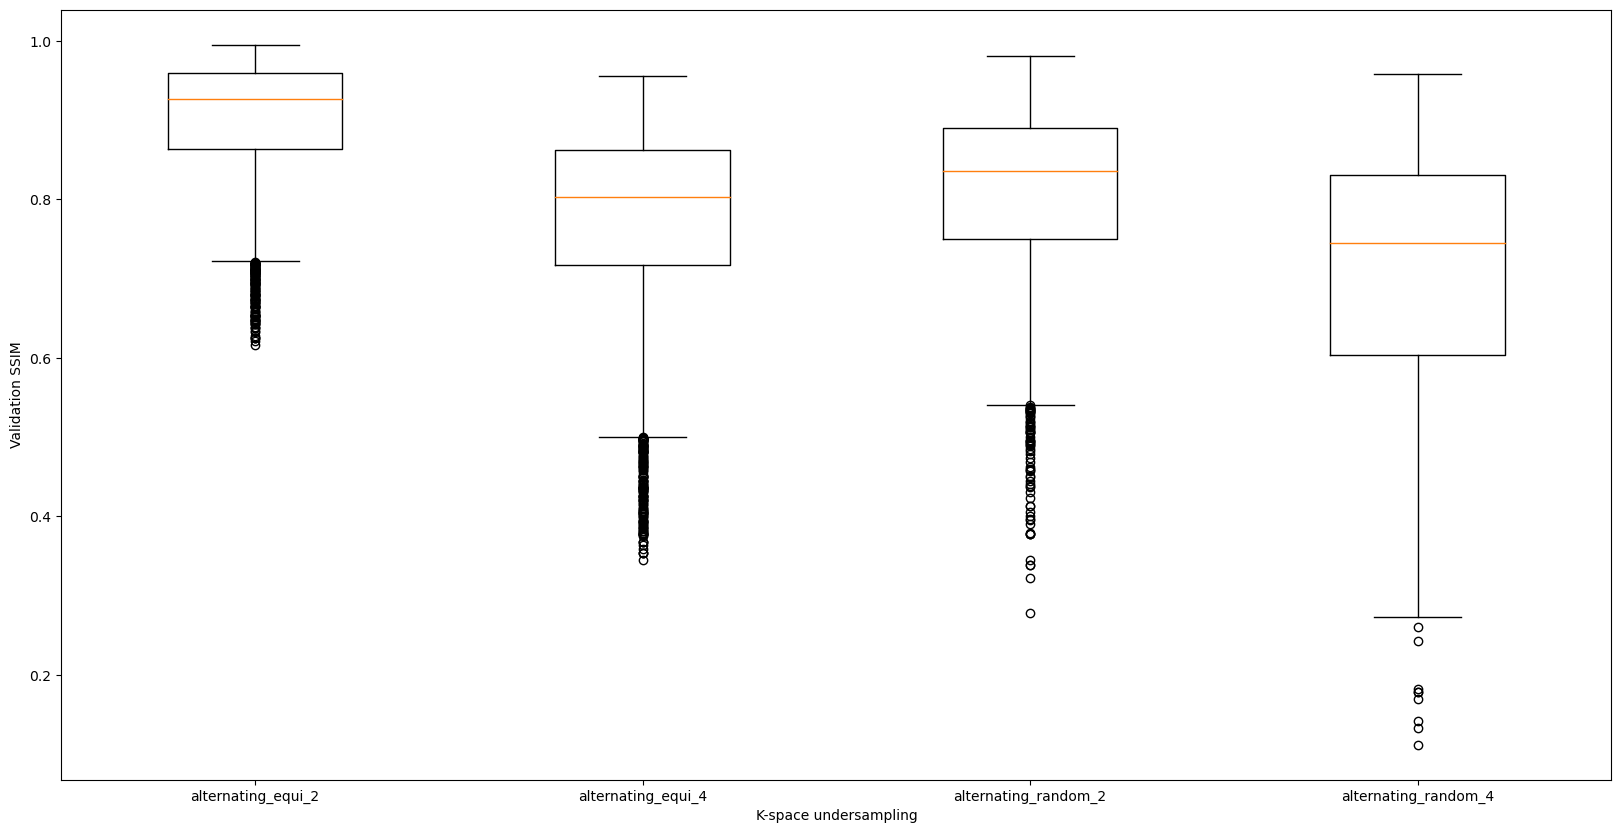

In [36]:
import matplotlib.pyplot as plt
import numpy as np

models = ["interleaved_equi_2", "interleaved_equi_4", "interleaved_random_2", "interleaved_random_4", \
    "alternating_equi_2", "alternating_equi_4", "alternating_random_2", "alternating_random_4"][4:]
ssims = []
names = []

for model in models:
    path = f"/data/vision/polina/users/ramyamut/projects/mri_final_project/models/{model}/brain/results/ssim.npy"
    ssim = np.load(path)
    ssims.append(ssim)
    names.append(model)
    print(f"Model: {model}, SSIM: {np.mean(ssim)} +/- {np.std(ssim)}")

plt.figure(figsize=(20,10))
plt.boxplot(ssims, labels=names)
plt.xlabel("K-space undersampling")
plt.ylabel("Validation SSIM")
plt.show()